# Метод Герона и все такое
---

In [13]:
def issqrt(a):
    x = a
    counter = 0
    x1 = x
    while counter <= 100:
        x1 = 0.5*(x1 + a/x)
        if x1 >= x:
            return x
        x = x1
        counter += 1
        
print(issqrt(30))

15.5
8.717741935483872
6.079500014920474
5.507058168194934
5.477306378956984
5.47722557564769
5.477225575051661
5.477225575051661


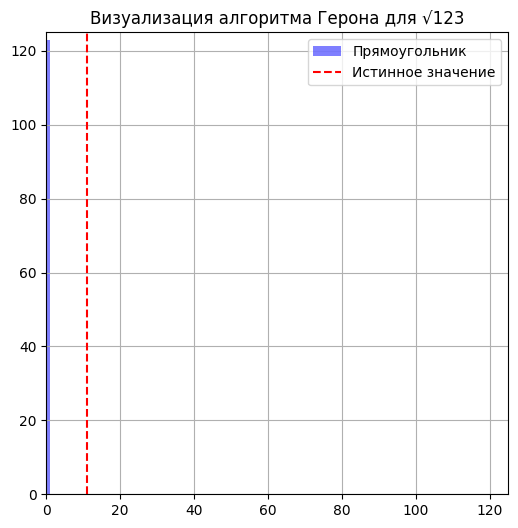

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import sleep

# Число для извлечения
N = int(input())
# Начальное приближение
guess = 1.0

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal', adjustable='box')
ax.set_title(f'Визуализация алгоритма Герона для √{N}')
ax.set_xlim(0, max(N, guess) + 2)
ax.set_ylim(0, max(N, guess) + 2)
ax.grid(True)

# Исходные элементы для анимации
rectangle = plt.Rectangle((0, 0), guess, N / guess, fc='blue', alpha=0.5, label='Прямоугольник')
ax.add_patch(rectangle)
ax.axvline(N**0.5, color='red', linestyle='--', label='Истинное значение')
iter_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12)

# Данные для анимации
frames_data_values = [] # список из приближений
current_guess = 1.0
for i in range(100):
    current_guess = 0.5 * (current_guess + N / current_guess)
    frames_data_values.append(current_guess)
    if len(frames_data_values) > 1 and abs(frames_data_values[-1] - frames_data_values[-2]) < 1e-6:
        break

def update(frame):
    sleep(2) # замедление анимации
    iteration_number, current_guess = frame
    height = N / current_guess
    
    # Обновление прямоугольника
    rectangle.set_width(current_guess)
    rectangle.set_height(height)
    
    # Обновление текста
    iter_text.set_text(f'Итерация: {iteration_number + 1}\nПриближение: {current_guess:.4f}\nВысота: {height:.4f}')
    
    # Обновление осей, чтобы они подстраивались под изменяющийся прямоугольник
    ax.set_xlim(0, max(N, current_guess) + 2)
    ax.set_ylim(0, max(N, height) + 2)
    
    return rectangle, iter_text

# Создание анимации
# Передаём в FuncAnimation итерируемый объект с номером кадра и значением
frames_with_index = list(enumerate(frames_data_values))
ani = animation.FuncAnimation(fig, update, frames=frames_with_index, blit=False, repeat=False)

ax.legend()
plt.show()

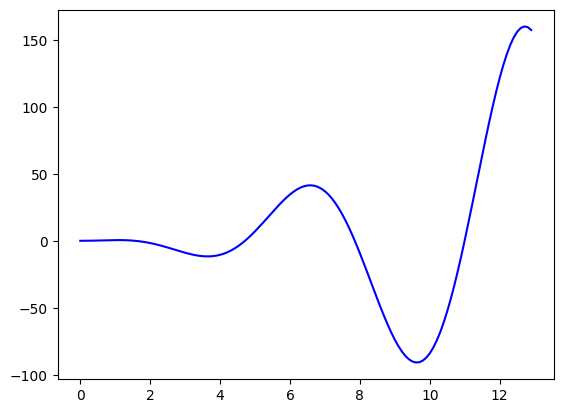

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fun = lambda x: x**2 * np.cos(x)
x = np.arange(0, 12+1, 0.1)
plt.plot(x, fun(x), color="b")
plt.show()

In [ ]:
def num_integral(A, B, N):
    DELTA_X = (B - A) / N
    S = 0
    for i in range(1, N+1):
        S+=fun(A + i*DELTA_X)*DELTA_X
    return S

def pogresh(A, B, N):
    I_real = real_integral(A, B)
    return abs((num_integral(A, B, N) - I_real) / I_real)

In [ ]:
data = []
with open("data/data.csv") as F:
    F.readline()
    for s in F:
        y, m, reg, t, rain = s.strip().split(";")
        data.append((y,m,reg,t,rain))
data = [(int(y), m, reg, float(t), int(rain))
        for y, m, reg, t, rain in dataa
        if t and rain]
data = [(y,m,reg,t,rain)
        for y, m, reg, t, rain in data
        if -80 <= t <= 50 and
        0 <= rain <= 1000]
data = list(set(data))
months = [
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
]
regions = set(reg for y, m, reg, t, rain in data )
regions = list(regions)

data = [(y, months.index(m),
        regions.index(reg), t, rain)
        for y, m, reg, t, rain in data]